In [1]:
#Import Package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

In [2]:
#Loading Forms
#Ignore Lines Starting With #
#Ensure You Put This File With Your Excel/CSV... In One Folder
#Change the form's name to yours and then just need to run the program!
df_week = pd.read_csv("traac_01212024-01272024.csv",comment="#")

In [3]:
#Preview Data
#Check if you loaded it successfully
print(df_week.head())#5 rows as default

  Session default channel group  Users  Sessions  Engaged sessions  \
0                Organic Search    664       778               558   
1                      Referral    252       313               214   
2                        Direct    239       276               153   
3                Organic Social     26        29                17   
4                    Unassigned     18        18                 0   

   Average engagement time per session  Engaged sessions per user  \
0                           131.028278                   0.840361   
1                           113.159744                   0.849206   
2                            63.300725                   0.640167   
3                           142.965517                   0.653846   
4                           147.833333                   0.000000   

   Events per session  Engagement rate  Event count  Conversions  \
0            9.695373         0.717224         7543            0   
1           11.942492       

In [4]:
#Display What Kinds of Data We Are Analyzing
print(df_week.columns[0])

Session default channel group


In [5]:
#Users; Sessions; Engaged sessions; Average engagement time per session; Engaged sessions per user; Events per session; Engagement rate;
#Event count are meaningful here
#Below will be using bar charts & pie charts

In [6]:
#Barplots
subtitle_comb = "Last Week"
def barplot_traac(df_,
                  num=10,#Num determines how many countries on the graph, sorted and get the first num
                  col=(df_week).columns[0],#Display what metric we are analyzing
                  title_="",#Whole title name
                  width_=0.15,#Bar width
                  figsize1=20,#Figure width
                  figsize2=20,#Figure height
                  xfont=20,#Xlabel fontsize
                  yfont=20,#Ylabel fontsize
                  titlefont=20,#Whole title fontsize
                  xlabelfont=20,#X-Label fontsize
                  ylabelfont=20,#Y-Label fontsize
                  legend_1font=20,#Internal legend fontsize
                  comlegend=20,#External legend fontsize
                  subfont=20,#Subtitle fontsize
                  textfont=20,#Text after bar: fontsize
                  legtitle=20#Legend title font size
                  ):#When running functions, lease adjust parameters if you want
    
    #Sort
    df = (df_.sort_values(by="Users", ascending=False)).head(num)
    n = df.shape[0]#Number of rows (posts)
    
    #Below list all the columns of interest to display in graph
    user = df["Users"]
    ses = df["Sessions"]
    eng_ses = df["Engaged sessions"]
    event_cnt = df["Event count"]
    
    #Construction of plots
    #Preset
    ind = np.arange(n)
    width = width_
    #Initialization
    fig, ax = plt.subplots(figsize=(figsize1, figsize2))#Use subplots to get the axis object
    #Draw side-by-side barplots and store the returned objects
    bars_user = ax.barh(ind, user, height=width, label='Users')#Notice here I use ax.barh to do the plotting
    bars_ses = ax.barh(ind + width, ses, height=width, label='Sessions')
    bars_engagement = ax.barh(ind + width * 2, eng_ses, height=width, label='Engaged Sessions')
    bars_eventcnt = ax.barh(ind + width * 3, event_cnt, height=width, label="Event Count")
    #Add the exact value to the right of each bar
    for bars in [bars_user, bars_ses, bars_engagement, bars_eventcnt]:
        for bar in bars:
            value = bar.get_width()#Get bar's width
            ax.text(value, bar.get_y() + bar.get_height()/2,#Annotating location
                    f'{value}',#Text
                    va='center', ha='left',fontsize=textfont)#Ax.text to annotate
    #Set labels & title & ticks
    ax.set_xlabel('Count',fontsize=xfont)#Label X-axis, notice here I use ax.set to do the setting
    ax.set_ylabel(col,fontsize=yfont)#Label Y-axis
    ax.set_title(title_,fontsize=titlefont)#Set title
    ax.set_yticks(ind + width * 1.5, df[col],fontsize=ylabelfont)#Label each row in the plot, add ticks, If don't set X-ticks here, they will disappear
    xticks_values = np.arange(0, (event_cnt.max())*1.2, step=round((event_cnt.max())*1.2,-3)/10)
    ax.set_xticks(xticks_values)
    ax.set_xticklabels([str(int(x)) for x in xticks_values], rotation=90,fontsize=xlabelfont)
    plt.suptitle(f"Traffic Acquisition Data Analytics: {col}",fontsize=subfont)
    #Set legends
    #First legend for metrics
    handles, labels = ax.get_legend_handles_labels()
    first_legend = ax.legend(handles, labels, loc='best', title="Metrics", fontsize=legend_1font)
    ax.add_artist(first_legend)
    #Combined legend for engagement rate and click-through rate per post
    combined_rate_handles = [
        #Set legend's content
        Patch(label=f"""{row[col]}: 
        Eng. Rate: {row['Engagement rate']:.2f}; 
        Eng. Sessions / User: {row['Engaged sessions per user']:.2f}; 
        Avg. Eng. Time / Session: {row['Average engagement time per session']:.2f}; 
        Events / Session: {row['Events per session']:.2f}""")
        for _, row in df.iterrows()
    ]
    ax.legend(handles=combined_rate_handles, 
              title="Eng. Rate & Eng. Sessions Per User & Avg. Eng. Time Per Session & Events Per Session", title_fontsize=legtitle,
                                fontsize=comlegend, loc='upper left', bbox_to_anchor=(1, 1.05))#Locate the legend outside
    
    #Show
    plt.show()

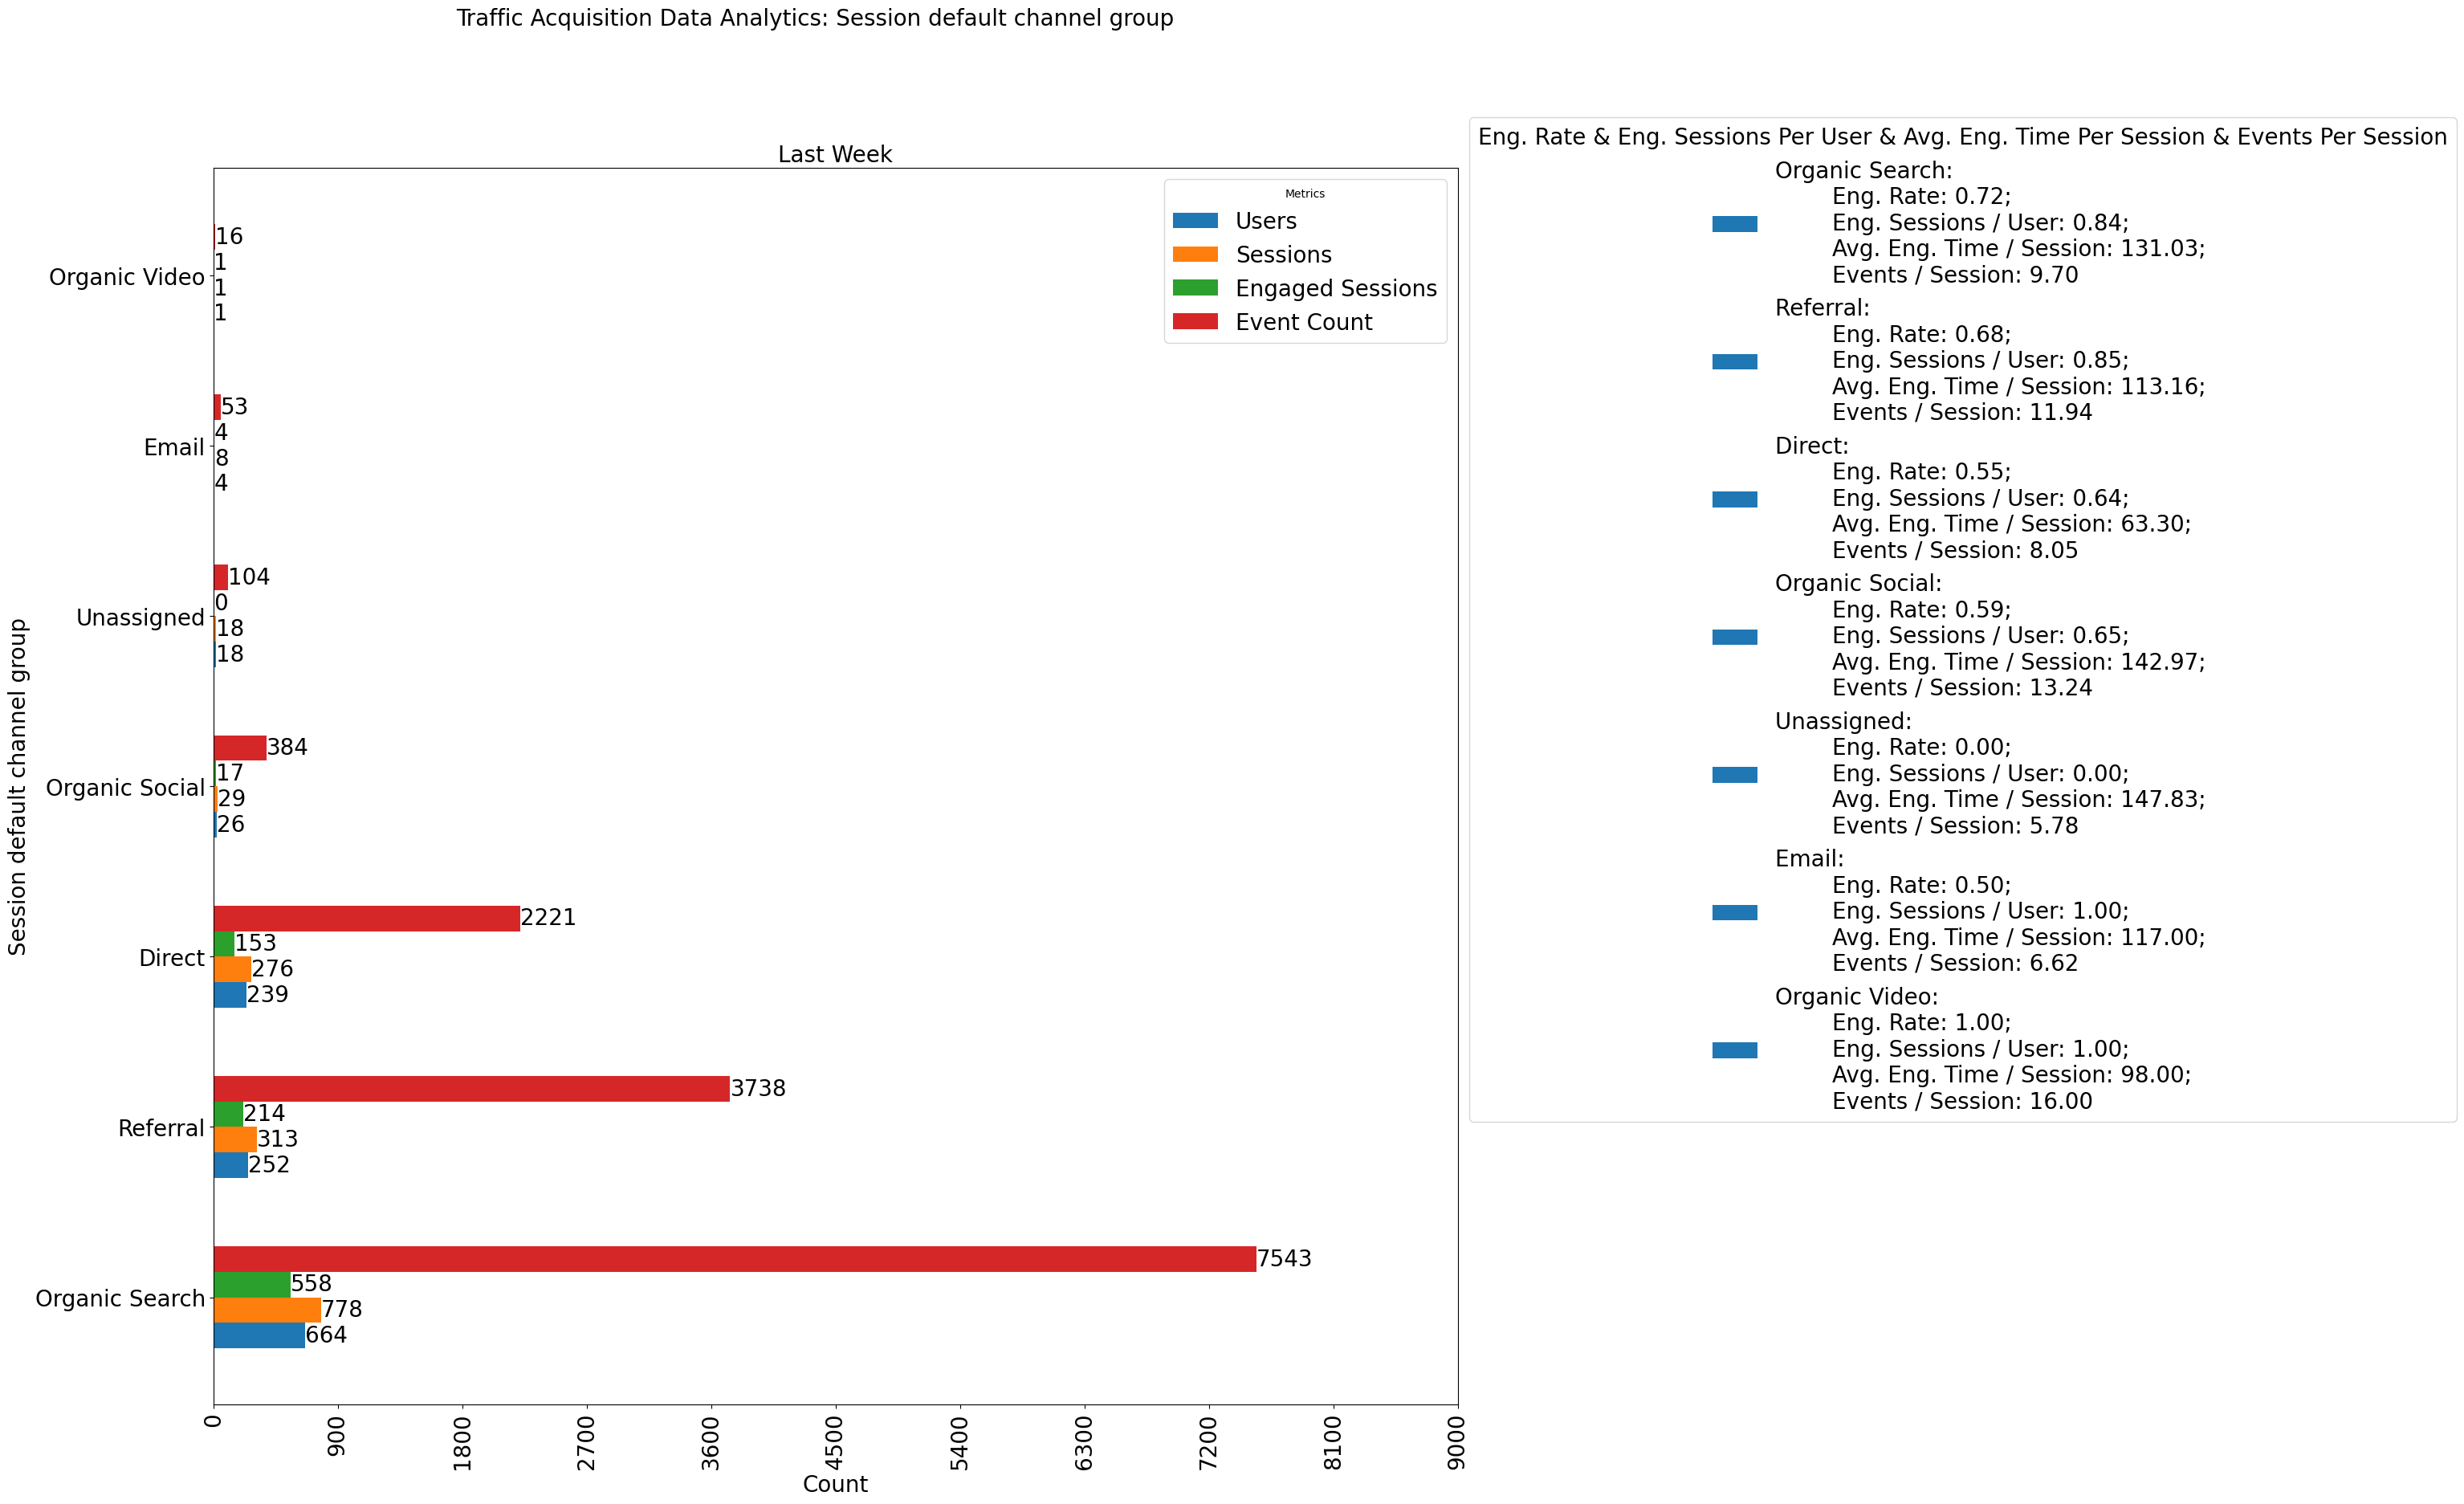

In [7]:
barplot_traac(df_week,title_=(subtitle_comb),col=(df_week).columns[0])

In [8]:
#Pie Chart For Three Periods
#Note that pie chart is used to show percentages
def pieplot_traac(column,
                  col=(df_week).columns[0],#Display what metric we are analyzing
                  figsize1=20,#Figure's width
                  figsize2=20,#Figure's height
                  show=0.05,#Threshold of display of percentage
                  font=10,#Text fontsize, including labels & inside text
                  titlefont=20,#Title fontsize
                  subfont=20,#Subtitle fontsize
                  labeldisplay=5#Threshold to display the first labeldisplay largest's names
                  ):#When running functions, lease adjust parameters if you want
    
    #Initialization
    plt.figure(figsize=(figsize1, figsize2))
    
    #Function to decide whether to display the percentage on the slice
    def autopct_format(values):
        def my_autopct(pct):
            total = sum(values)#Get total, values is a list of value
            val = int(round(pct*total/100.0))#Get percentage
            if val > (total * show):#If the slice is larger than 5% (default) of the total then display the percentage on plot
                return '{p:.2f}%'.format(p=pct)#Round to two decimal places
            else:
                return ''#Do not show
        return my_autopct
    
    #Construction of plots
    #Sort: make the dimension decreasing
    df = df_week.sort_values(by=column, ascending=False)
    labels_ = df[col]#Labels of pie chart, act as a vector
    labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest
    sizes = df[column]##Get exact values' list, for future text usage
    #We are interested in all now
    #Draw pie chart according to percentage, set label size
    plt.pie(df[column], labels = labels_,textprops={'fontsize': font}, autopct=autopct_format(sizes))#autopct controls text inside
    plt.title(subtitle_comb,fontsize=titlefont)
    plt.suptitle(f"{column} For {col}",fontsize=subfont)
    
    #Show
    plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22932\851181735.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


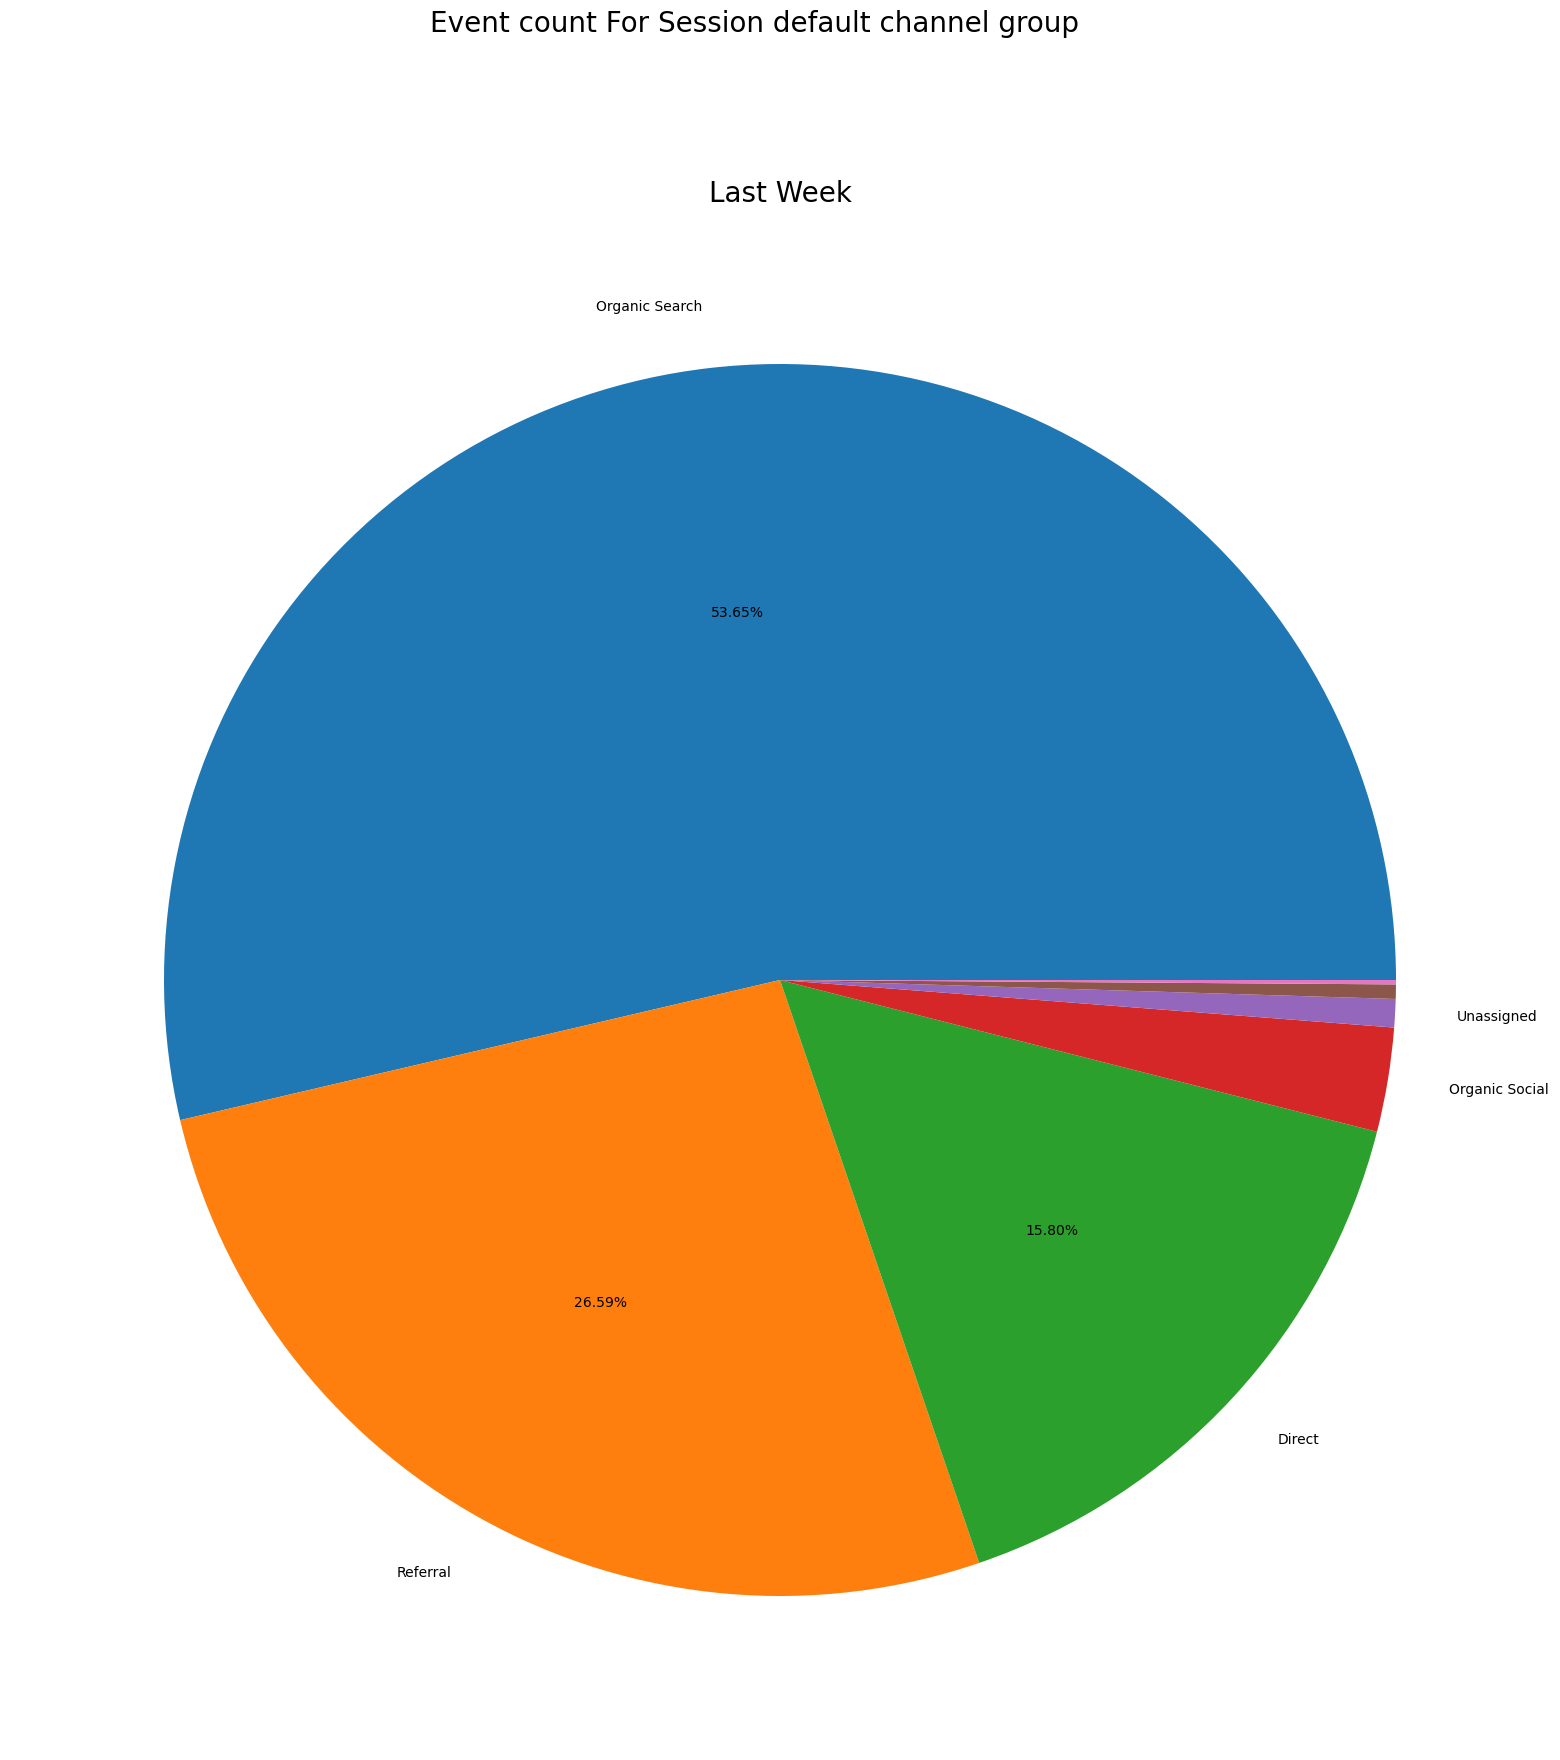

In [9]:
#Event Count: Pieplot
pieplot_traac(column="Event count", col=(df_week).columns[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22932\851181735.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


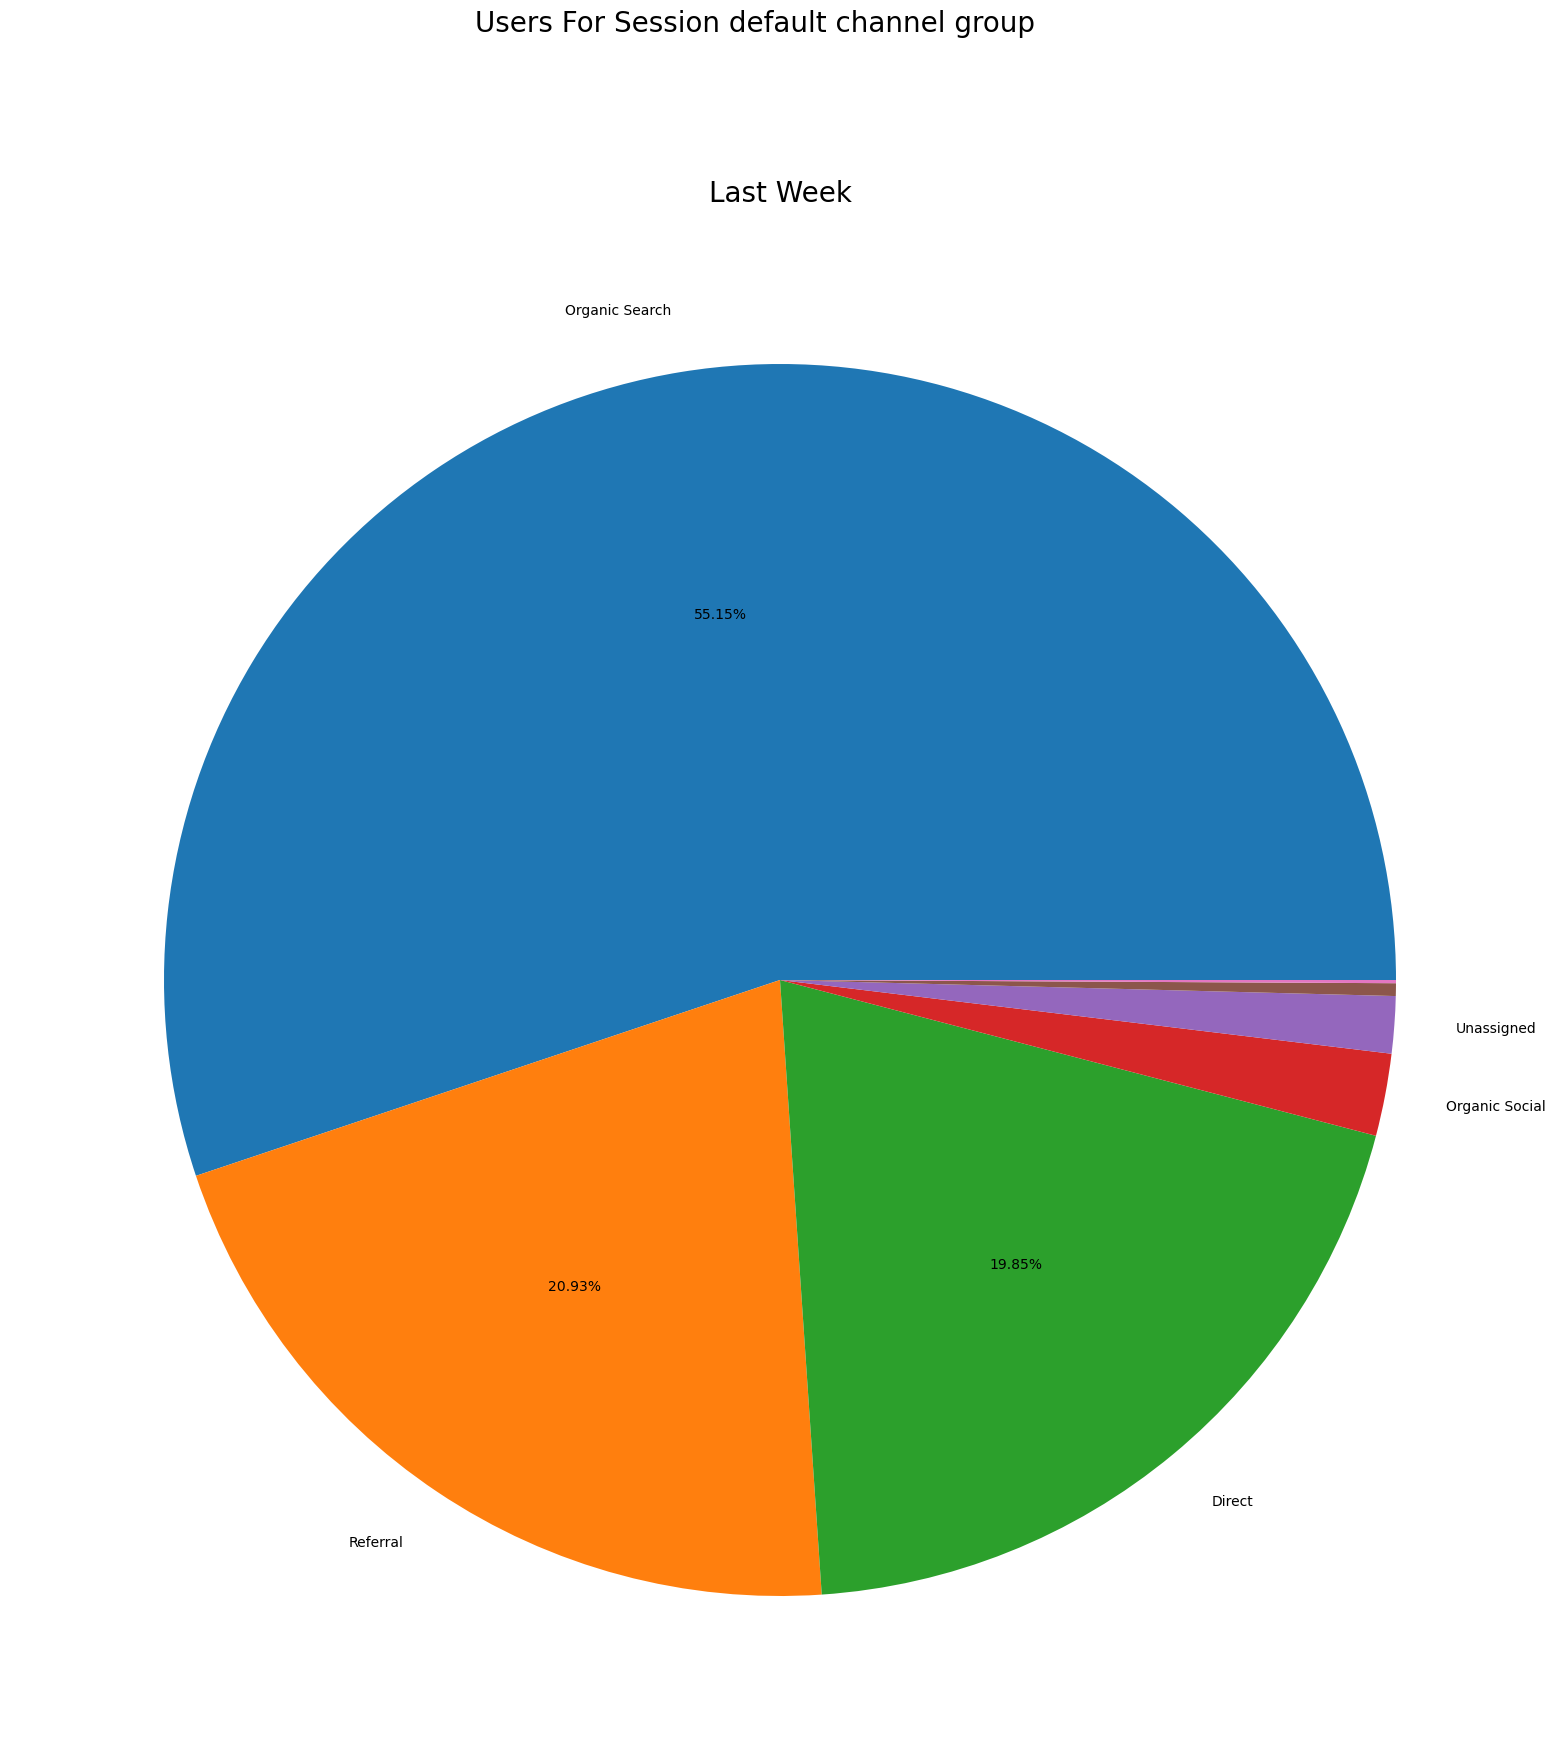

In [10]:
#Users: Pieplot
pieplot_traac(column="Users",col=(df_week).columns[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22932\851181735.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


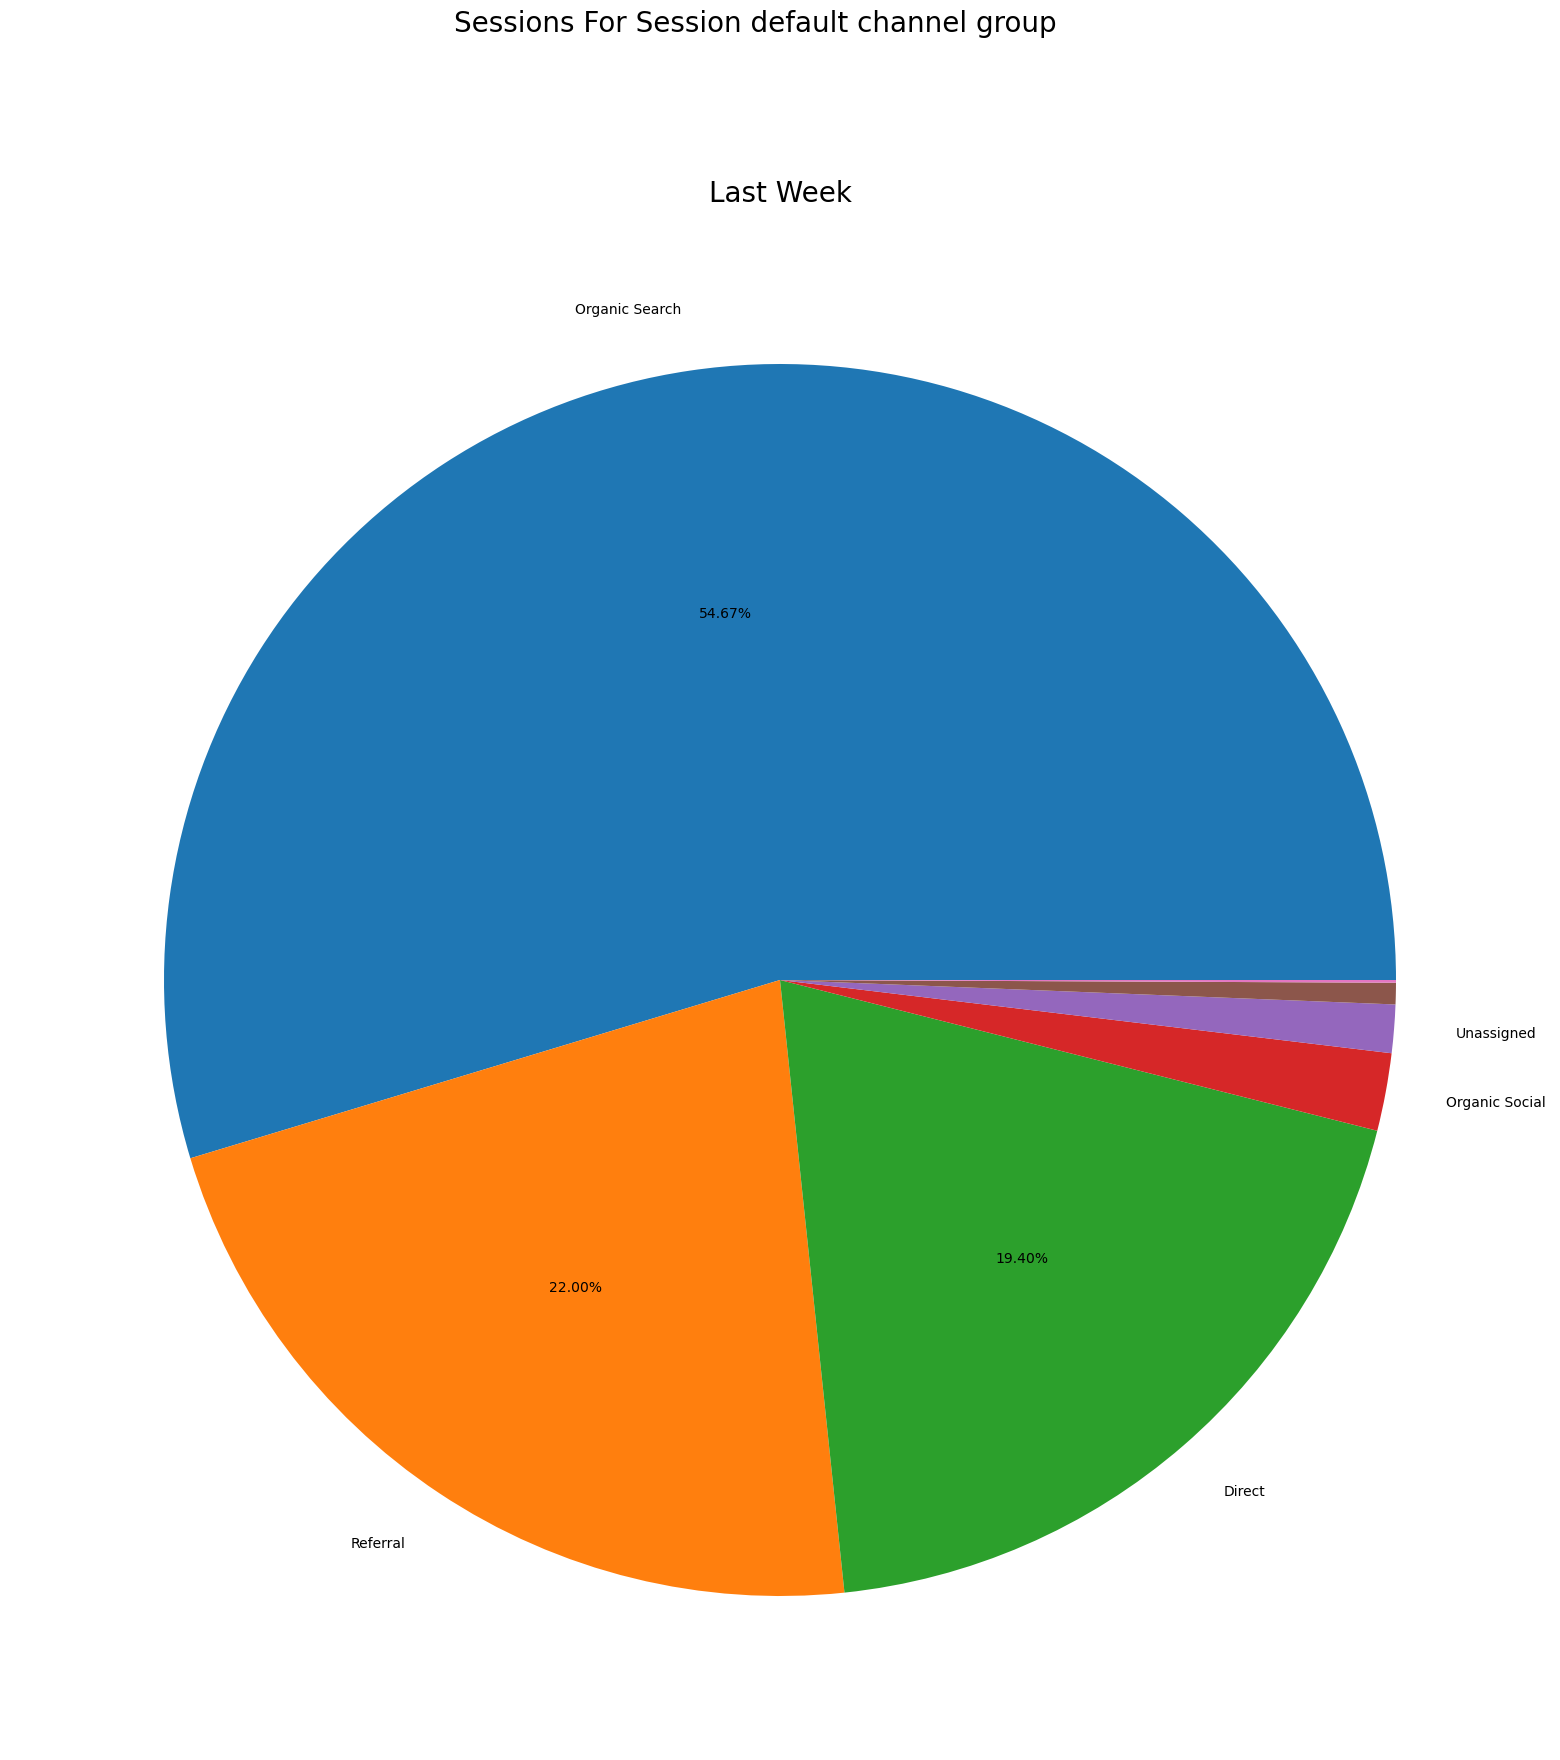

In [11]:
#Sessions: Pieplot
pieplot_traac(column="Sessions",col=(df_week).columns[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_22932\851181735.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


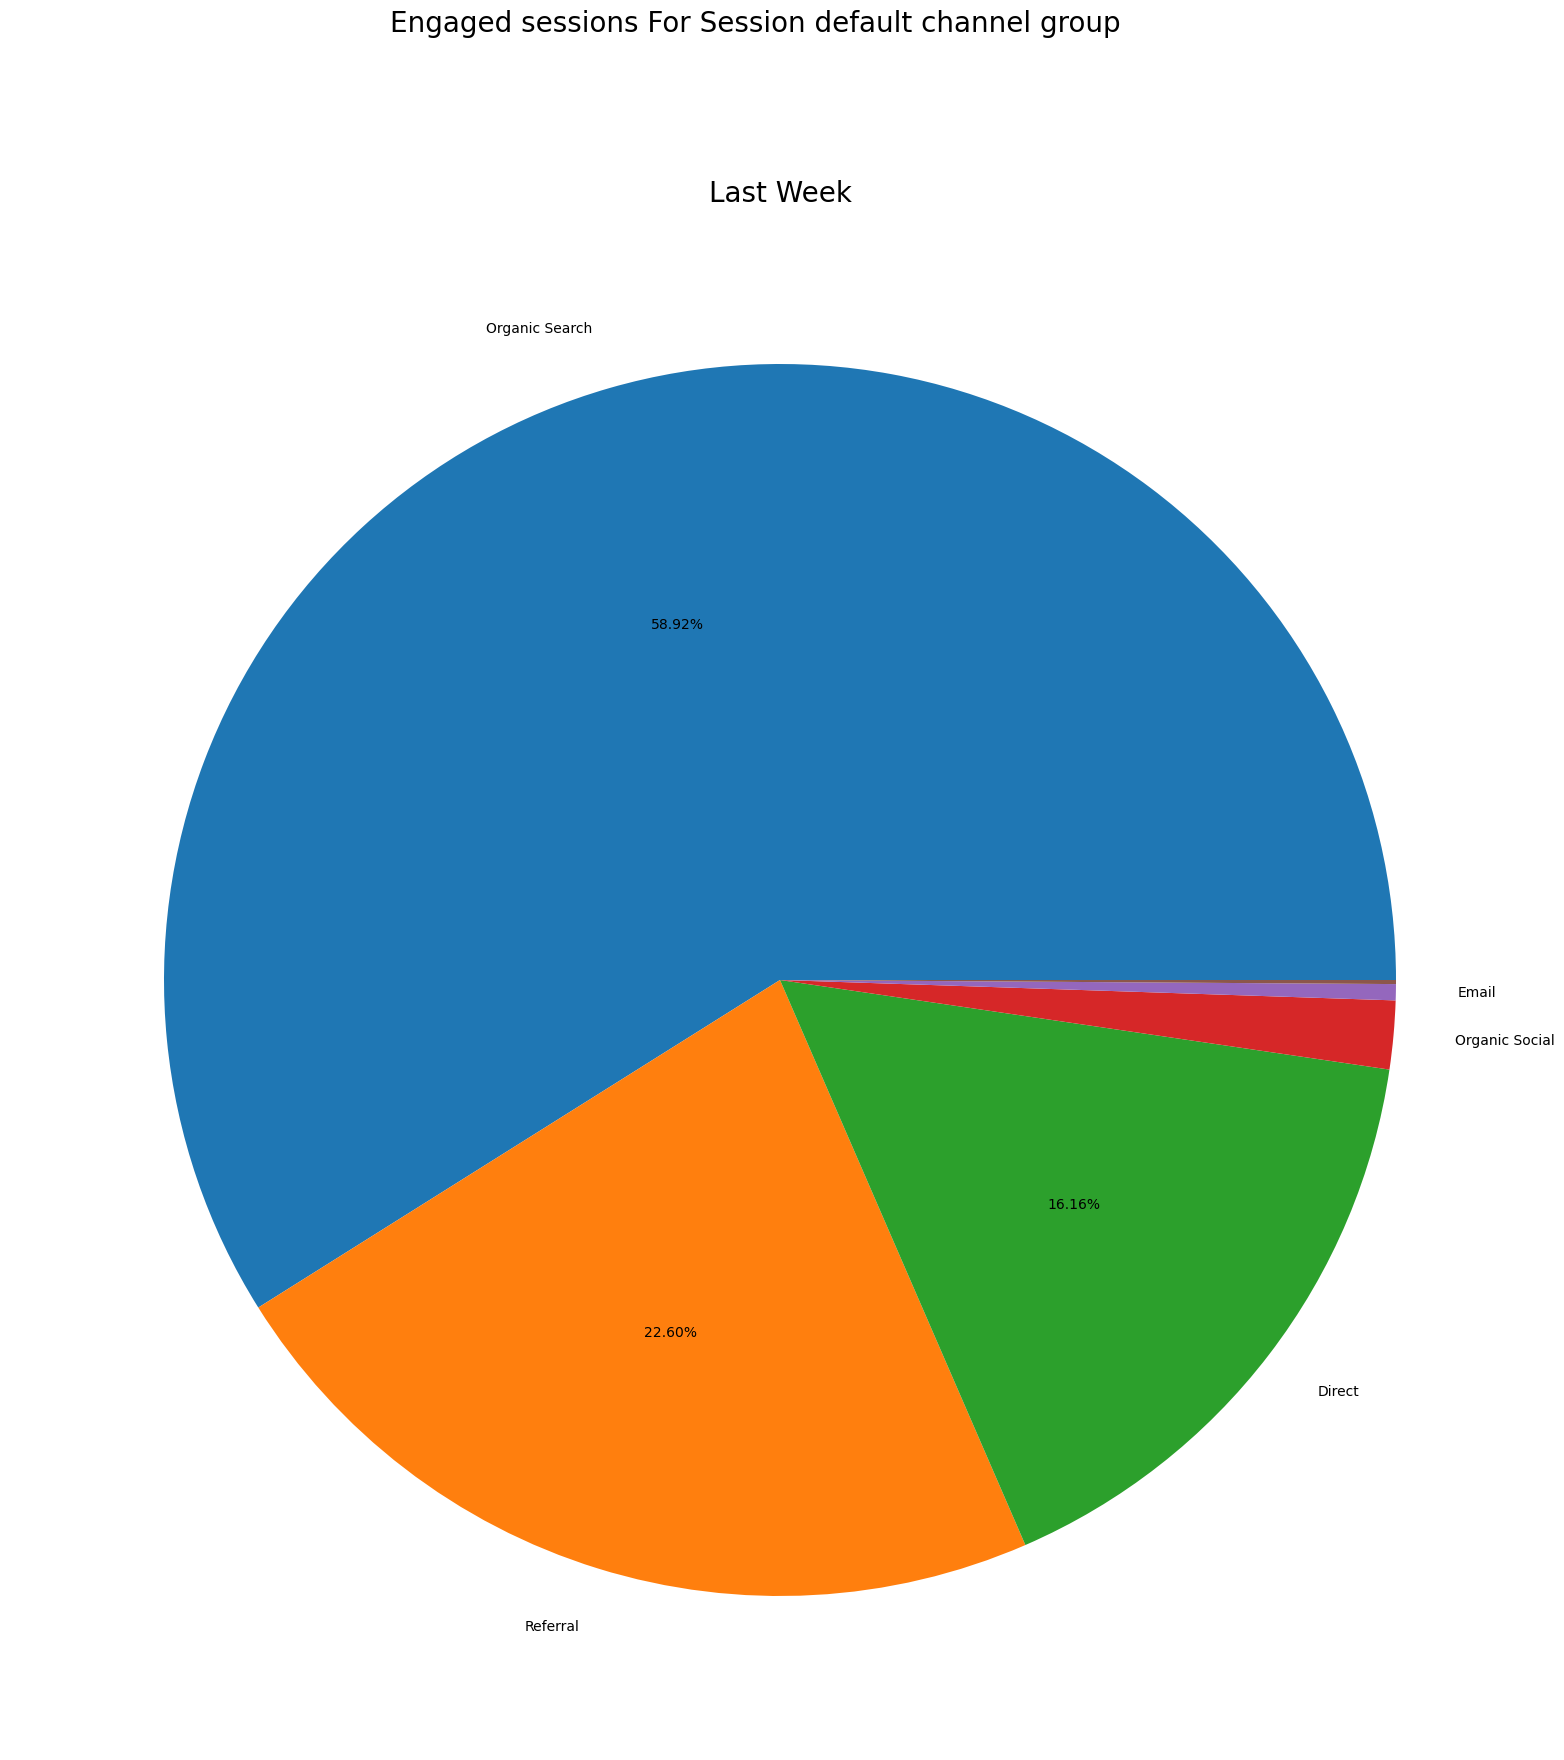

In [12]:
#Engaged Session: Pieplot
pieplot_traac(column="Engaged sessions",col=(df_week).columns[0])

In [13]:
#Click File on the topleft, then click Print Preview to show the output, then make screenshots!